In [279]:
import os
import pandas as pd

In [280]:
results = pd.read_json(os.path.join('data','ergast-results.json'))

In [281]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'code', 'forename',
       'surname', 'dob', 'nationality', 'driverUrl', 'year', 'round', 'date',
       'quali_date', 'quali_time', 'location', 'country', 'gp', 'status',
       'constructor', 'constructorNationality', 'constructorRef', 'name',
       'age'],
      dtype='object')

In [282]:
def rank23(ser):
    series = ser.copy()
    first_non_zero_index = series[~series.isnull()].index[0]
    series = series[series.index >= first_non_zero_index]
    series = series.fillna(0)
    value23 = series[2023.0]
    larger = len(series[series > value23])
    smaller = len(series[series < value23])
    equal = len(series[series == value23]) - 1
    return f"""{larger} seasons larger than 2023, {smaller} seasons smaller than 2023, {equal} seasons equal to 2023"""

In [283]:
results['year'].nunique()

74

## From what grid places did the top 3 finishers start?

In [284]:
podiums = results[results['position'].isin([1,2,3])]

In [285]:
podiums.groupby('year')['grid'].mean().nsmallest(6)

year
2015.0    2.807018
2007.0    2.882353
2010.0    2.929825
2002.0    3.019608
1993.0    3.104167
2011.0    3.122807
Name: grid, dtype: float64

In [286]:
podiums.groupby('year')['grid'].mean().nlargest(6)

year
1956.0    7.620690
1968.0    6.472222
1960.0    6.258065
1982.0    6.145833
1957.0    5.880000
1983.0    5.795455
Name: grid, dtype: float64

<Axes: xlabel='year'>

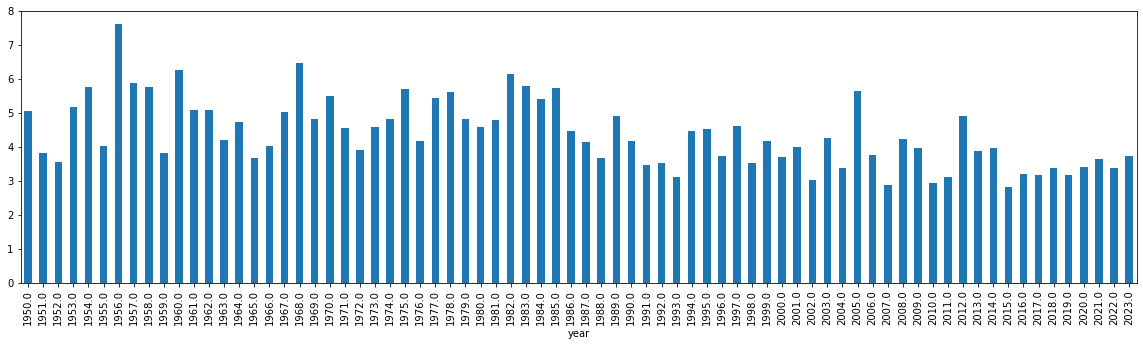

In [287]:
podiums.groupby('year')['grid'].mean().plot.bar(figsize=(20,5))

In [288]:
rank23(podiums.groupby('year')['grid'].mean())

'51 seasons larger than 2023, 22 seasons smaller than 2023, 0 seasons equal to 2023'

## Crashes (DNF-level) per race

In [289]:
crashes = ["Accident", "Collision", "Fatal accident", "Collision damage", "Spun off", "Front wing","Debris","Tyre puncture","Broken wing","Fire","Engine fire"]

In [290]:
results['status'].drop_duplicates().to_list()

['Finished',
 '+1 Lap',
 'Engine',
 'Collision',
 'Accident',
 'Transmission',
 'Clutch',
 'Electrical',
 'Hydraulics',
 'Disqualified',
 '+2 Laps',
 'Spun off',
 'Gearbox',
 'Radiator',
 'Suspension',
 '+4 Laps',
 'Brakes',
 '+3 Laps',
 'Overheating',
 'Tyre',
 'Puncture',
 'Driveshaft',
 'Fuel pressure',
 'Retired',
 'Wheel',
 'Throttle',
 'Steering',
 'Differential',
 'Oil pressure',
 'Withdrew',
 'Oil leak',
 'Injured',
 'Out of fuel',
 '+5 Laps',
 'Fuel pump',
 'Exhaust',
 '+6 Laps',
 '+9 Laps',
 'Rear wing',
 'Water leak',
 'Did not qualify',
 'Wheel nut',
 'Heat shield fire',
 'Vibrations',
 'Alternator',
 'Collision damage',
 'Fuel system',
 'Pneumatics',
 'ERS',
 '+8 Laps',
 'Power Unit',
 'Turbo',
 'Power loss',
 'Battery',
 'Water pump',
 'Fuel leak',
 'Wheel rim',
 '+7 Laps',
 'Not classified',
 'Handling',
 'Ignition',
 'Stalled',
 'Wheel bearing',
 'Did not prequalify',
 'Injection',
 'Distributor',
 'Technical',
 'Mechanical',
 'Front wing',
 'Electronics',
 'Engine misf

<Axes: xlabel='year'>

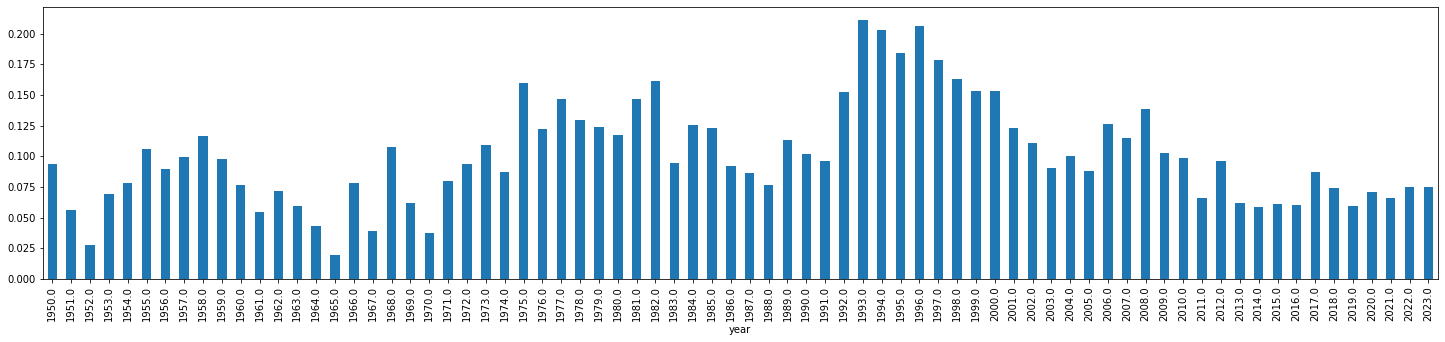

In [291]:
(results[results['status'].isin(crashes)].groupby('year')['resultId'].nunique() / results.groupby('year')['resultId'].nunique()).plot.bar(figsize=(25,5))

In [292]:
rank23((results[results['status'].isin(crashes)].groupby('year')['resultId'].nunique() / results.groupby('year')['resultId'].nunique()))

'52 seasons larger than 2023, 20 seasons smaller than 2023, 1 seasons equal to 2023'

## From hero to zero

In [463]:
laps = pd.read_csv(os.path.join('data_raw','lap_times.csv'))

In [464]:
laps = laps.merge(results[results['year'] >= 1996][['raceId','driverId','grid','laps','year','round','gp','name','constructor','status']], on=['raceId','driverId'], how='outer')

In [465]:
total_laps = pd.Series(laps.groupby('raceId')['lap'].max(), name="totalLaps")

In [466]:
laps = laps.merge(total_laps, on='raceId')

In [467]:
laps

,raceId,driverId,lap,position,time,milliseconds,grid,laps,year,round,gp,name,constructor,status,totalLaps
0,841.0,20.0,1.0,1.0,1:38.109,98109.0,1.0,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58.0
1,841.0,20.0,2.0,1.0,1:33.006,93006.0,1.0,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58.0
2,841.0,20.0,3.0,1.0,1:32.713,92713.0,1.0,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58.0
3,841.0,20.0,4.0,1.0,1:32.803,92803.0,1.0,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58.0
4,841.0,20.0,5.0,1.0,1:32.342,92342.0,1.0,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560845,1118.0,848.0,NaN,NaN,NaN,NaN,13.0,0.0,2023.0,20.0,São Paulo Grand Prix,Alexander Albon,Williams,Collision,71.0
560846,1118.0,844.0,NaN,NaN,NaN,NaN,0.0,0.0,2023.0,20.0,São Paulo Grand Prix,Charles Leclerc,Ferrari,Engine,71.0
560847,1118.0,825.0,NaN,NaN,NaN,NaN,12.0,0.0,2023.0,20.0,São Paulo Grand Prix,Kevin Magnussen,Haas F1 Team,Collision,71.0
560848,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0,22.0,Abu Dhabi Grand Prix,None,None,None,NaN


In [468]:
fromherotozero = laps[(((laps['lap'] == laps['laps']) | (laps['lap'] == laps['laps'] -1 )  | (laps['lap'] == laps['laps'] -2 )) & (laps['position'] == 1) & (laps['laps'] < laps['totalLaps']) | ((laps['laps'] == 0) & (laps['grid'] == 1)))].drop(columns=['lap','time','milliseconds']).drop_duplicates()
fromherotozero = fromherotozero[fromherotozero['status'] != 'Finished']

In [469]:
fromherotozero['lapsUntilFinish'] = fromherotozero['totalLaps'] - fromherotozero['laps']

In [473]:
fromherotozero.groupby(['name','year'])['raceId'].nunique().nlargest(10)

name                year  
Charles Leclerc     2022.0    3
Juan Pablo Montoya  2001.0    3
Kimi Räikkönen      2005.0    3
Lewis Hamilton      2012.0    3
Mika Häkkinen       1999.0    3
Damon Hill          1996.0    2
David Coulthard     1998.0    2
                    1999.0    2
Juan Pablo Montoya  2003.0    2
Lewis Hamilton      2016.0    2
Name: raceId, dtype: int64

In [474]:
fromherotozero.sort_values(by=["year",'round'])[['year','gp','name','lapsUntilFinish','status']].tail(10)

,year,gp,name,lapsUntilFinish,status
430209,2018.0,Azerbaijan Grand Prix,Valtteri Bottas,3.0,Puncture
437723,2018.0,German Grand Prix,Sebastian Vettel,16.0,Accident
466182,2019.0,Russian Grand Prix,Sebastian Vettel,27.0,Power loss
497371,2021.0,Monaco Grand Prix,Charles Leclerc,78.0,Driveshaft
497516,2021.0,Azerbaijan Grand Prix,Max Verstappen,6.0,Accident
502966,2021.0,British Grand Prix,Max Verstappen,52.0,Collision
505487,2021.0,Italian Grand Prix,Lewis Hamilton,28.0,Collision
520206,2022.0,Spanish Grand Prix,Charles Leclerc,39.0,Turbo
522657,2022.0,Azerbaijan Grand Prix,Charles Leclerc,30.0,Power Unit
526890,2022.0,French Grand Prix,Charles Leclerc,36.0,Accident


In [441]:
(fromherotozero.groupby('year')['raceId'].nunique() / results[results['year'] >= 1996].groupby('year')['raceId'].nunique())

year
1958.0         NaN
1967.0         NaN
1974.0         NaN
1975.0         NaN
1977.0         NaN
1982.0         NaN
1990.0         NaN
1994.0         NaN
1996.0    0.250000
1997.0    0.294118
1998.0    0.187500
1999.0    0.375000
2000.0    0.235294
2001.0    0.117647
2002.0    0.176471
2003.0    0.312500
2004.0    0.111111
2005.0    0.315789
2006.0    0.166667
2007.0    0.058824
2008.0    0.166667
2009.0         NaN
2010.0    0.105263
2011.0         NaN
2012.0    0.200000
2013.0    0.052632
2014.0    0.157895
2015.0    0.052632
2016.0    0.142857
2017.0    0.050000
2018.0    0.095238
2019.0    0.047619
2020.0         NaN
2021.0    0.181818
2022.0    0.090909
2023.0         NaN
Name: raceId, dtype: float64

<Axes: xlabel='year'>

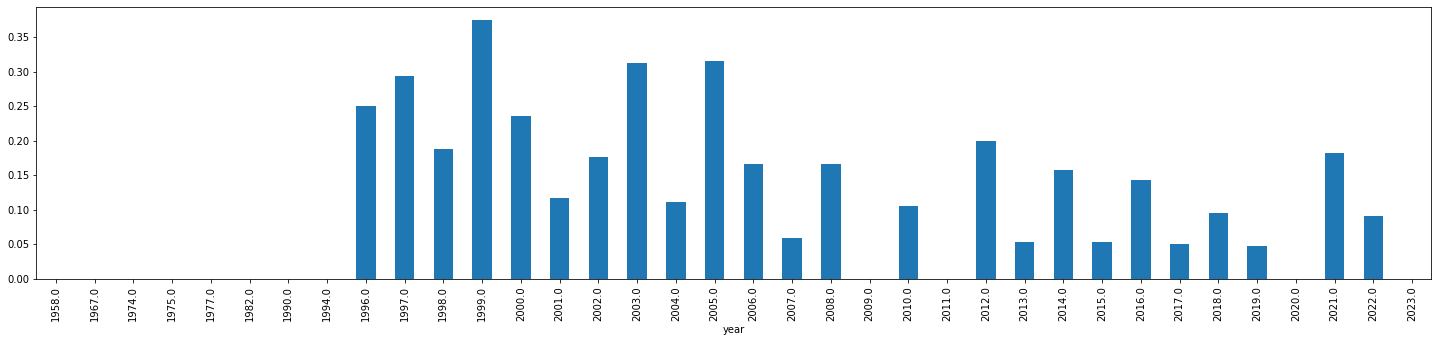

In [442]:
(fromherotozero.groupby('year')['raceId'].nunique() / results[results['year'] >= 1996].groupby('year')['raceId'].nunique()).plot.bar(figsize=(25,5))

In [443]:
rank23((fromherotozero.groupby('year')['raceId'].nunique() / results[results['year'] >= 1996].groupby('year')['raceId'].nunique()))

'24 seasons larger than 2023, 0 seasons smaller than 2023, 3 seasons equal to 2023'

## Leading driver changes

In [306]:
raceids = results['raceId'].drop_duplicates().to_list()

In [307]:
def get_leader_changes(id):
    wdf = laps[laps['raceId'] == id]
    if len(wdf) == 0:
        return None
    else:
        wdf = wdf[wdf['position'] == 1].sort_values(by='lap')
        leaders = wdf['name'].to_list()
        dummy_leader = None
        count = -1
        for l in leaders:
            if l == dummy_leader:
                pass
            else:
                dummy_leader = l
                count = count + 1
        return count

In [308]:
leaderChanges = {}
for r in raceids:
    leaderChanges[r] = get_leader_changes(r)
leaderChanges = pd.DataFrame.from_dict([leaderChanges]).transpose()
leaderChanges['raceId'] = leaderChanges.index
leaderChanges = leaderChanges.rename(columns={0 : 'leaderChanges'})

In [309]:
leaderChanges

,leaderChanges,raceId
18.0,4.0,18.0
19.0,5.0,19.0
20.0,3.0,20.0
21.0,3.0,21.0
22.0,7.0,22.0
...,...,...
794.0,-1.0,794.0
800.0,-1.0,800.0
1120.0,-1.0,1120.0
1119.0,-1.0,1119.0


In [310]:
results = results.merge(leaderChanges, on='raceId')

In [311]:
results['leaderChanges'] = pd.to_numeric(results['leaderChanges'])

In [312]:
results.groupby(['year','gp'])['leaderChanges'].mean().nlargest(20)

year    gp                   
2008.0  Japanese Grand Prix      10.0
2011.0  Japanese Grand Prix      10.0
2013.0  Australian Grand Prix    10.0
2002.0  French Grand Prix         9.0
2005.0  Japanese Grand Prix       9.0
2011.0  Belgian Grand Prix        9.0
        German Grand Prix         9.0
        Hungarian Grand Prix      9.0
2013.0  Chinese Grand Prix        9.0
        Malaysian Grand Prix      9.0
2022.0  British Grand Prix        9.0
2003.0  Monaco Grand Prix         8.0
2004.0  Belgian Grand Prix        8.0
        Brazilian Grand Prix      8.0
        German Grand Prix         8.0
2005.0  European Grand Prix       8.0
2008.0  German Grand Prix         8.0
2011.0  Brazilian Grand Prix      8.0
        Chinese Grand Prix        8.0
        Spanish Grand Prix        8.0
Name: leaderChanges, dtype: float64

In [313]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'code', 'forename',
       'surname', 'dob', 'nationality', 'driverUrl', 'year', 'round', 'date',
       'quali_date', 'quali_time', 'location', 'country', 'gp', 'status',
       'constructor', 'constructorNationality', 'constructorRef', 'name',
       'age', 'leaderChanges'],
      dtype='object')

In [314]:
threetimers = results[results['year'] >= 1996].groupby('location')['raceId'].nunique()
threetimers = threetimers[threetimers >= 3]
threetimers = threetimers.index.to_list()

In [315]:
results[results['location'].isin(threetimers)].groupby(['location'])['leaderChanges'].mean().dropna().sort_values(ascending=False)

location
Kuala Lumpur      4.150485
Austin            3.902655
Sakhir            3.528571
Istanbul          3.447917
Shanghai          3.315789
Jeddah            3.000000
Melbourne         2.956989
Montmeló          2.638701
Baku              2.535211
Valencia          2.428571
Abu Dhabi         2.353535
Magny Cours       2.042857
Budapest          1.960718
São Paulo         1.957470
Suzuka            1.674449
Marina Bay        1.637584
Sochi             1.595092
Uttar Pradesh     1.571429
Montreal          1.133721
Yeongam County    0.765957
Nürburg           0.739754
Spielberg         0.713961
Silverstone       0.607345
Spa               0.579968
Hockenheim        0.549733
Indianapolis      0.462478
Imola             0.255629
Monza             0.230176
Mexico City       0.018587
Monte-Carlo      -0.066910
Le Castellet     -0.501040
Buenos Aires     -0.607143
Zandvoort        -0.678715
Name: leaderChanges, dtype: float64

In [316]:
results[results['year'] >= 1996].groupby('year')['leaderChanges'].mean().tail()

year
2019.0    2.333333
2020.0    1.823529
2021.0    2.590909
2022.0    3.454545
2023.0    1.835821
Name: leaderChanges, dtype: float64

<Axes: xlabel='year'>

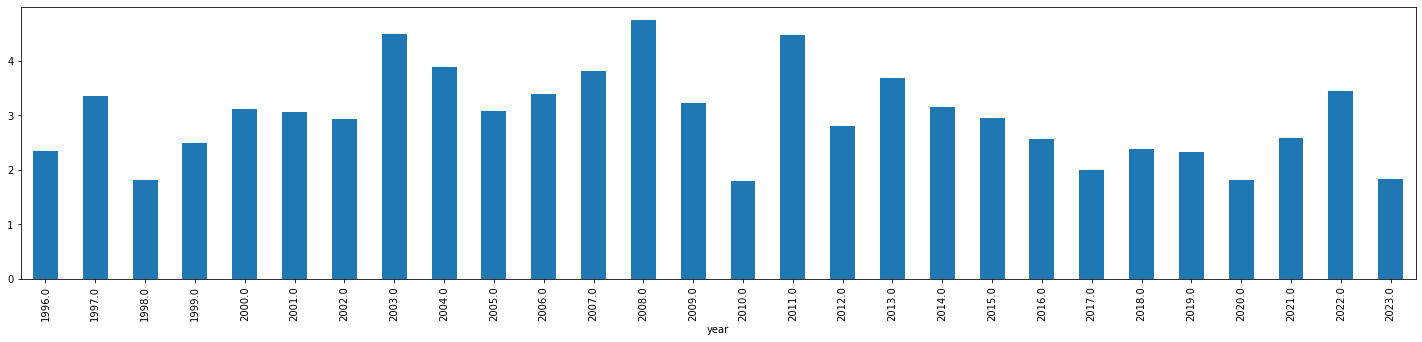

In [317]:
results[results['year'] >= 1996].groupby('year')['leaderChanges'].mean().plot.bar(figsize=(25,5))

In [318]:
rank23(results[results['year'] >= 1996].groupby('year')['leaderChanges'].mean())

'24 seasons larger than 2023, 3 seasons smaller than 2023, 0 seasons equal to 2023'

<Axes: xlabel='year'>

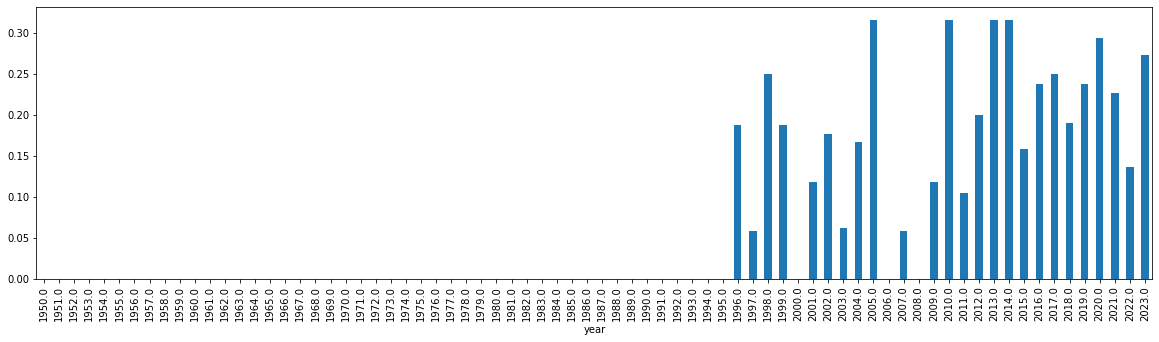

In [319]:
(results[results['leaderChanges'] == 0].groupby('year')['raceId'].nunique() / results.groupby('year')['raceId'].nunique()).plot.bar(figsize=(20,5))

In [320]:
rank23(results[results['leaderChanges'] == 0].groupby('year')['raceId'].nunique() / results.groupby('year')['raceId'].nunique())

'5 seasons larger than 2023, 22 seasons smaller than 2023, 0 seasons equal to 2023'

<Axes: xlabel='year'>

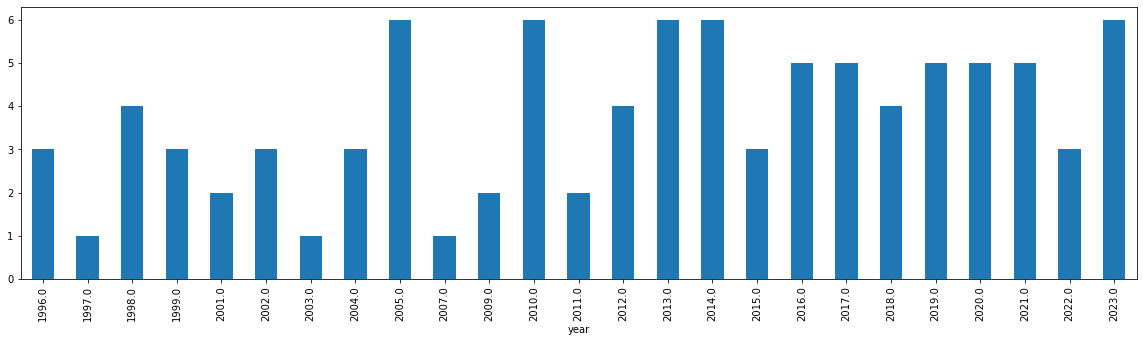

In [403]:
results[(results['leaderChanges'] == 0) & (results['position'] == 1)].groupby('year')['raceId'].nunique().plot.bar(figsize=(20,5))

In [405]:
rank23(results[(results['leaderChanges'] == 0) & (results['position'] == 1)].groupby('year')['raceId'].nunique())

'0 seasons larger than 2023, 20 seasons smaller than 2023, 4 seasons equal to 2023'

## The gap between the deciding race and the end of the season

In [323]:
titles = pd.read_csv(os.path.join("data_raw","titles.csv"))

In [324]:
titles['year'] = titles['date'].apply(lambda x: int(x[0:4]))

In [325]:
titles

,date,champion,year
0,1950-09-03,Nino Farina,1950
1,1951-10-28,Juan Fangio,1951
2,1952-08-03,Alberto Ascari,1952
3,1953-08-23,Alberto Ascari,1953
4,1954-08-22,Juan Fangio,1954
...,...,...,...
69,2019-11-03,Lewis Hamilton,2019
70,2020-11-15,Lewis Hamilton,2020
71,2021-12-12,Max Verstappen,2021
72,2022-10-09,Max Verstappen,2022


In [326]:
races_raw = pd.read_csv(os.path.join('data_raw','races.csv'))

In [327]:
races_raw = races_raw[['year','date']]

In [328]:
seasonEnds = pd.DataFrame(races_raw.groupby('year')['date'].max())

In [329]:
seasonEnds['year'] = seasonEnds.index

In [330]:
seasonEnds['year'] = seasonEnds['year'].astype(int)
seasonEnds = seasonEnds.reset_index(drop=True)

In [331]:
seasonEnds

,date,year
0,1950-09-03,1950
1,1951-10-28,1951
2,1952-09-07,1952
3,1953-09-13,1953
4,1954-10-24,1954
...,...,...
69,2019-12-01,2019
70,2020-12-13,2020
71,2021-12-12,2021
72,2022-11-20,2022


In [332]:
titles['decidingDate'] = titles['date']
titles = titles.drop(columns = ['date'])

In [333]:
titles = titles.merge(seasonEnds, on='year')

In [334]:
titles = titles.rename(columns = {'date': 'lastDate'})

In [335]:
titles['decidingDate'] = pd.to_datetime(titles['decidingDate'])

In [336]:
titles['lastDate'] = pd.to_datetime(titles['lastDate'])

In [337]:
titles

,champion,year,decidingDate,lastDate
0,Nino Farina,1950,1950-09-03,1950-09-03
1,Juan Fangio,1951,1951-10-28,1951-10-28
2,Alberto Ascari,1952,1952-08-03,1952-09-07
3,Alberto Ascari,1953,1953-08-23,1953-09-13
4,Juan Fangio,1954,1954-08-22,1954-10-24
...,...,...,...,...
69,Lewis Hamilton,2019,2019-11-03,2019-12-01
70,Lewis Hamilton,2020,2020-11-15,2020-12-13
71,Max Verstappen,2021,2021-12-12,2021-12-12
72,Max Verstappen,2022,2022-10-09,2022-11-20


In [338]:
titles['gap'] = titles['lastDate'] - titles['decidingDate']

In [339]:
titles['gap']

0     0 days
1     0 days
2    35 days
3    21 days
4    63 days
       ...  
69   28 days
70   28 days
71    0 days
72   42 days
73   50 days
Name: gap, Length: 74, dtype: timedelta64[ns]

In [340]:
titles.sort_values(by=['gap','year']).head(35)

,champion,year,decidingDate,lastDate,gap
0,Nino Farina,1950,1950-09-03,1950-09-03,0 days
1,Juan Fangio,1951,1951-10-28,1951-10-28,0 days
6,Juan Fangio,1956,1956-09-02,1956-09-02,0 days
8,Mike Hawthorn,1958,1958-10-19,1958-10-19,0 days
9,Jack Brabham,1959,1959-12-12,1959-12-12,0 days
12,Graham Hill,1962,1962-12-29,1962-12-29,0 days
14,John Surtees,1964,1964-10-25,1964-10-25,0 days
17,Denny Hulme,1967,1967-10-22,1967-10-22,0 days
18,Graham Hill,1968,1968-11-03,1968-11-03,0 days
24,Emerson Fittipaldi,1974,1974-10-06,1974-10-06,0 days


In [341]:
titles.sort_values(by=['gap','year']).tail(35)

,champion,year,decidingDate,lastDate,gap
20,Jochen Rindt,1970,1970-10-04,1970-10-25,21 days
27,Niki Lauda,1977,1977-10-02,1977-10-23,21 days
45,Michael Schumacher,1995,1995-10-22,1995-11-12,21 days
55,Fernando Alonso,2005,2005-09-25,2005-10-16,21 days
11,Phil Hill,1961,1961-09-10,1961-10-08,28 days
22,Emerson Fittipaldi,1972,1972-09-10,1972-10-08,28 days
23,Jackie Stewart,1973,1973-09-09,1973-10-07,28 days
25,Niki Lauda,1975,1975-09-07,1975-10-05,28 days
28,Mario Andretti,1978,1978-09-10,1978-10-08,28 days
29,Jody Scheckter,1979,1979-09-09,1979-10-07,28 days


In [342]:
titles.index = titles['year']

In [343]:
titles['days'] = titles['gap'].dt.days

<Axes: xlabel='year'>

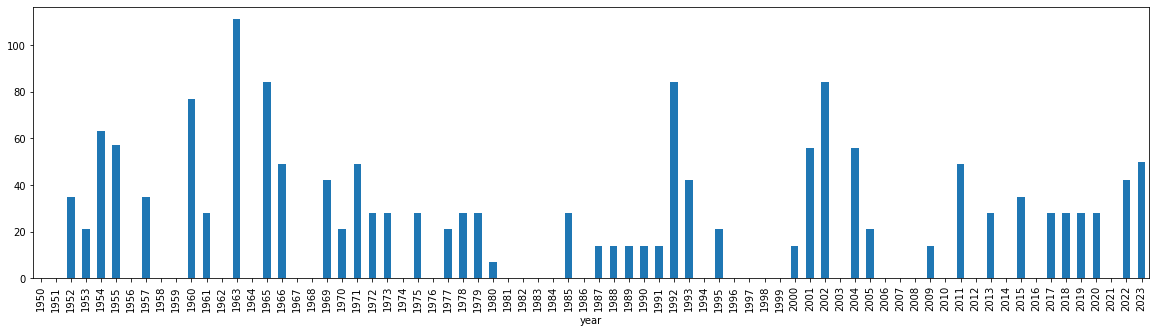

In [344]:
titles['days'].plot.bar(figsize=(20,5))

In [345]:
races_raw['date'] = pd.to_datetime(races_raw['date'])

In [346]:
races_raw['date']

0      2009-03-29
1      2009-04-05
2      2009-04-19
3      2009-04-26
4      2009-05-10
          ...    
1096   2023-10-22
1097   2023-10-29
1098   2023-11-05
1099   2023-11-19
1100   2023-11-26
Name: date, Length: 1101, dtype: datetime64[ns]

In [347]:
def howmanyleft(date1, date2):
    w2df = races_raw[(races_raw['date'] > pd.to_datetime(date1)) & (races_raw['date'] <= pd.to_datetime(date2))]
    return len(w2df['date'].drop_duplicates())

In [348]:
titles['racesLeft'] = titles.apply(lambda row: howmanyleft(row['decidingDate'], row['lastDate']), axis = 1)

In [408]:
races_total = pd.Series(results.groupby('year')['raceId'].nunique(), name='racesTotal')

In [419]:
titles = titles.reset_index(drop=True).merge(races_total, on='year')

In [420]:
titles['ratio'] = titles['racesLeft'] / titles['racesTotal']

In [422]:
titles.sort_values(by='ratio',ascending=False)

,champion,year,decidingDate,lastDate,gap,days,racesLeft,racesTotal,ratio
52,Michael Schumacher,2002,2002-07-21,2002-10-13,84 days,84,6,17,0.352941
42,Nigel Mansell,1992,1992-08-16,1992-11-08,84 days,84,5,16,0.312500
13,Jim Clark,1963,1963-09-08,1963-12-28,111 days,111,3,10,0.300000
15,Jim Clark,1965,1965-08-01,1965-10-24,84 days,84,3,10,0.300000
73,Max Verstappen,2023,2023-10-07,2023-11-26,50 days,50,6,22,0.272727
...,...,...,...,...,...,...,...,...,...
34,Niki Lauda,1984,1984-10-21,1984-10-21,0 days,0,0,16,0.000000
44,Michael Schumacher,1994,1994-11-13,1994-11-13,0 days,0,0,16,0.000000
36,Alain Prost,1986,1986-10-26,1986-10-26,0 days,0,0,16,0.000000
1,Juan Fangio,1951,1951-10-28,1951-10-28,0 days,0,0,8,0.000000


<Axes: xlabel='year'>

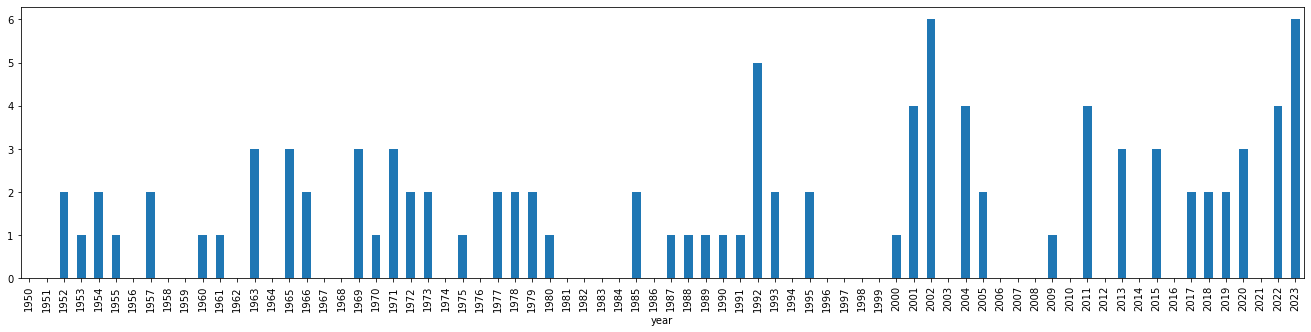

In [349]:
titles['racesLeft'].plot.bar(figsize=(23,5))

In [350]:
rank23(titles['racesLeft'])

'0 seasons larger than 2023, 72 seasons smaller than 2023, 1 seasons equal to 2023'

## Maiden wins, podiums and points

In [427]:
years = results['year'].sort_values().dropna().drop_duplicates().to_list()

<Axes: xlabel='year'>

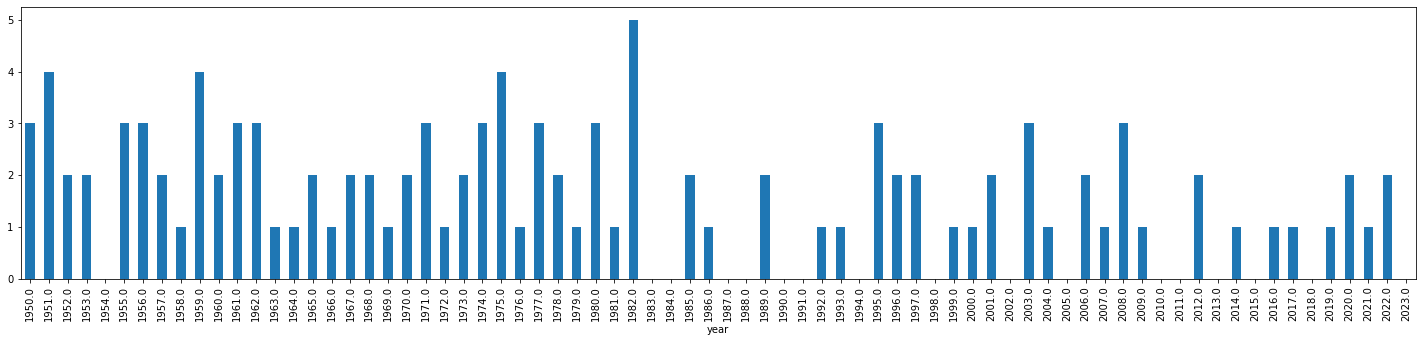

In [428]:
pd.DataFrame(results[results['position'] == 1].groupby('name')['year'].min()).groupby('year').size().reindex(index=years).plot.bar(figsize=(25,5))

In [429]:
results[results['position'] == 1].groupby('name')['year'].min().nlargest(10)

name
Carlos Sainz        2022.0
George Russell      2022.0
Esteban Ocon        2021.0
Pierre Gasly        2020.0
Sergio Pérez        2020.0
Charles Leclerc     2019.0
Valtteri Bottas     2017.0
Max Verstappen      2016.0
Daniel Ricciardo    2014.0
Nico Rosberg        2012.0
Name: year, dtype: float64

<Axes: xlabel='year'>

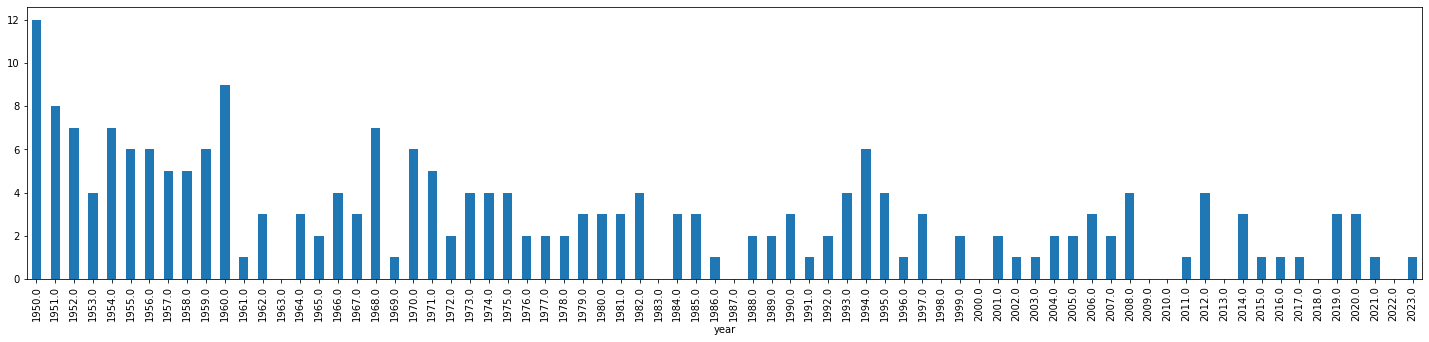

In [430]:
pd.DataFrame(results[results['position'] <= 3].groupby('name')['year'].min()).groupby('year').size().reindex(index=years).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

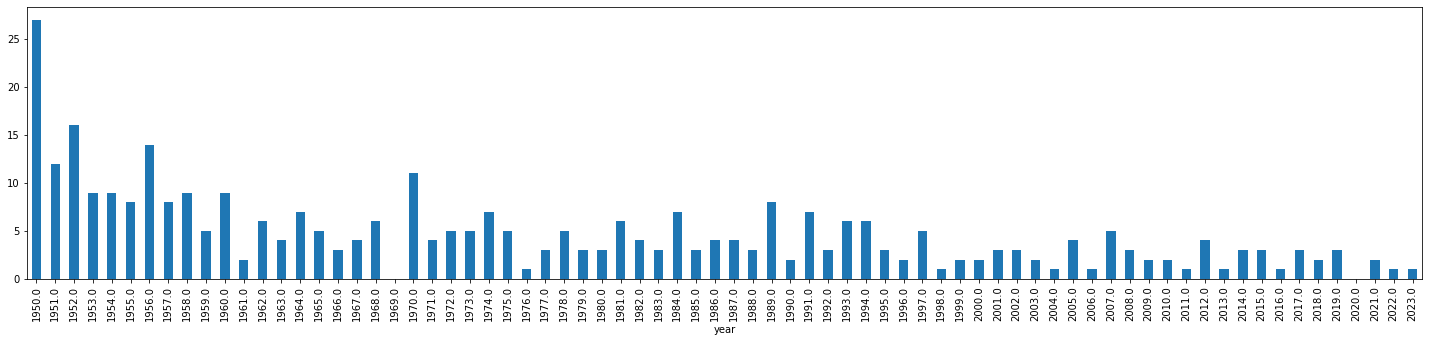

In [431]:
pd.DataFrame(results[results['position'] <= 6].groupby('name')['year'].min()).groupby('year').size().reindex(index=years).plot.bar(figsize=(25,5))

In [356]:
rank23(pd.DataFrame(results[results['position'] <= 6].groupby('name')['year'].min()).groupby('year').size().reindex(index=years))

'63 seasons larger than 2023, 2 seasons smaller than 2023, 8 seasons equal to 2023'

<Axes: xlabel='year'>

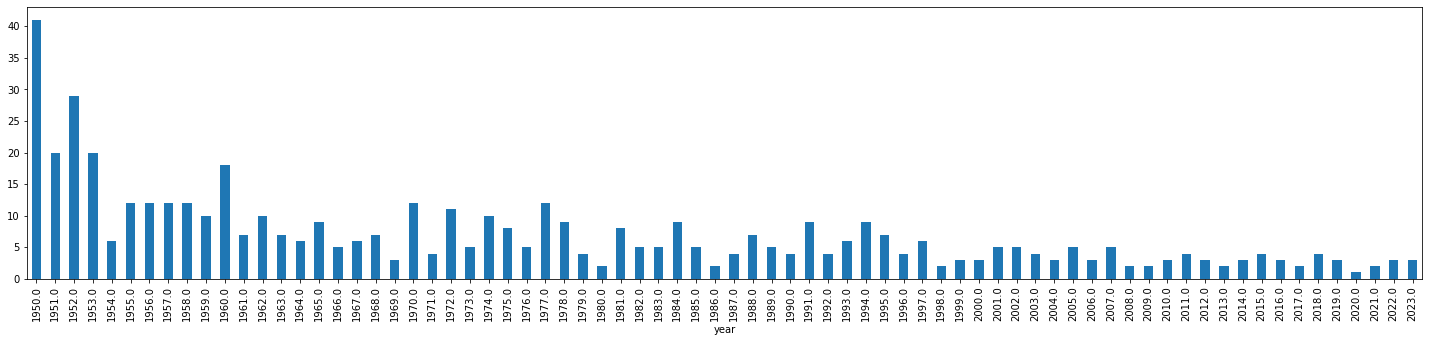

In [432]:
pd.DataFrame(results[results['position'] <= 10].groupby('name')['year'].min()).groupby('year').size().reindex(index=years).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

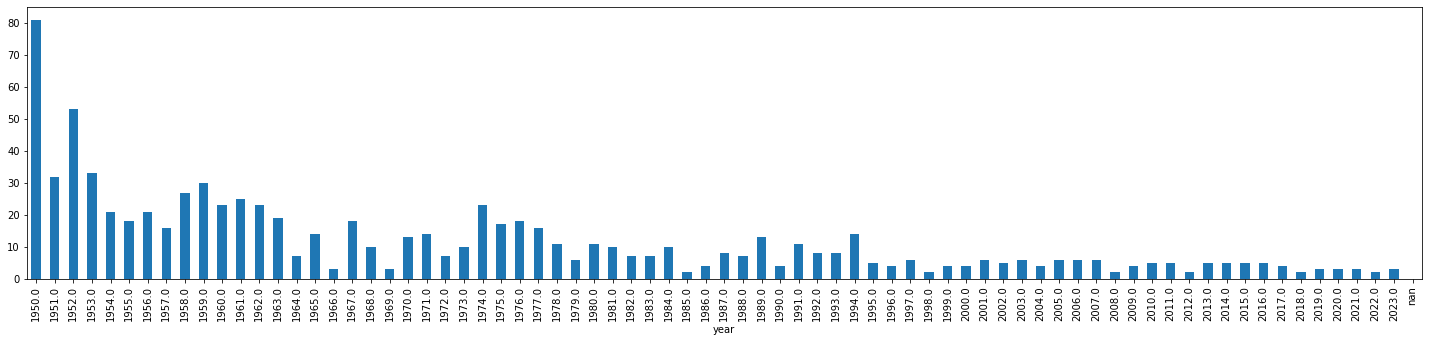

In [359]:
pd.DataFrame(results[results['points'] >= 0].groupby('name')['year'].min()).groupby('year').size().reindex(index=years).plot.bar(figsize=(25,5))

In [360]:
pd.DataFrame(results[results['points'] >= 0].groupby('name')['year'].min()).groupby('year').size().reindex(index=years)

year
1950.0    81.0
1951.0    32.0
1952.0    53.0
1953.0    33.0
1954.0    21.0
          ... 
2020.0     3.0
2021.0     3.0
2022.0     2.0
2023.0     3.0
NaN        NaN
Length: 75, dtype: float64

In [361]:
pd.DataFrame(results[results['points'] >= 0].groupby('name')['year'].min()).sort_values(by='year')

,year
name,
Lee Wallard,1950.0
Jimmy Davies,1950.0
Jim Rathmann,1950.0
Jerry Hoyt,1950.0
Bill Schindler,1950.0
...,...
Nyck de Vries,2022.0
Guanyu Zhou,2022.0
Logan Sargeant,2023.0


## Outstanding rookies

In [362]:
wpoints = {}
for y in range(1950, 2024):
    if y <= 1960:
        wpoints[y] = 8
    if y >= 1961 and y <= 1990:
        wpoints[y] = 9
    if y >= 1991 and y <= 2009:
        wpoints[y] = 10
    if y >= 2010:
        wpoints[y] = 25

In [363]:
winningpoints = pd.DataFrame([wpoints]).transpose().rename(columns={0:'wpoints'})
winningpoints['year'] = winningpoints.index
winningpoints = winningpoints.reset_index(drop=True)

In [364]:
racesperseason = pd.DataFrame(results.groupby('year')['raceId'].nunique())

In [365]:
racesperseason['year'] = racesperseason.index.astype(int)
racesperseason = racesperseason.reset_index(drop=True)

In [366]:
racesperseason = racesperseason.merge(winningpoints, on='year')

In [367]:
racesperseason

,raceId,year,wpoints
0,7,1950,8
1,8,1951,8
2,8,1952,8
3,9,1953,8
4,9,1954,8
...,...,...,...
69,21,2019,25
70,17,2020,25
71,22,2021,25
72,22,2022,25


In [368]:
racesperseason['possiblePoints'] = racesperseason['raceId'] * racesperseason['wpoints']

In [369]:
racesperseason

,raceId,year,wpoints,possiblePoints
0,7,1950,8,56
1,8,1951,8,64
2,8,1952,8,64
3,9,1953,8,72
4,9,1954,8,72
...,...,...,...,...
69,21,2019,25,525
70,17,2020,25,425
71,22,2021,25,550
72,22,2022,25,550


In [370]:
rookies = pd.DataFrame(results.groupby('name')['year'].min())
rookies['name'] = rookies.index
rookies = rookies.reset_index(drop = True)

In [371]:
rookies

,year,name
0,1952.0,Adolf Brudes
1,1953.0,Adolfo Cruz
2,2007.0,Adrian Sutil
3,1987.0,Adrián Campos
4,1988.0,Aguri Suzuki
...,...,...
853,2003.0,Zsolt Baumgartner
854,1952.0,Élie Bayol
855,1989.0,Éric Bernard
856,1991.0,Érik Comas


In [372]:
def points(year, name):
    return results[(results['year'] == year) & (results['name'] == name)]['points'].sum()

In [373]:
rookies = rookies.merge(racesperseason[['year','possiblePoints']], on='year')

In [374]:
rookies['pointsWon'] = rookies.apply(lambda row: points(row['year'], row['name']), axis = 1)

In [375]:
rookies['ratio'] = rookies['pointsWon'] / rookies['possiblePoints']

<Axes: xlabel='year'>

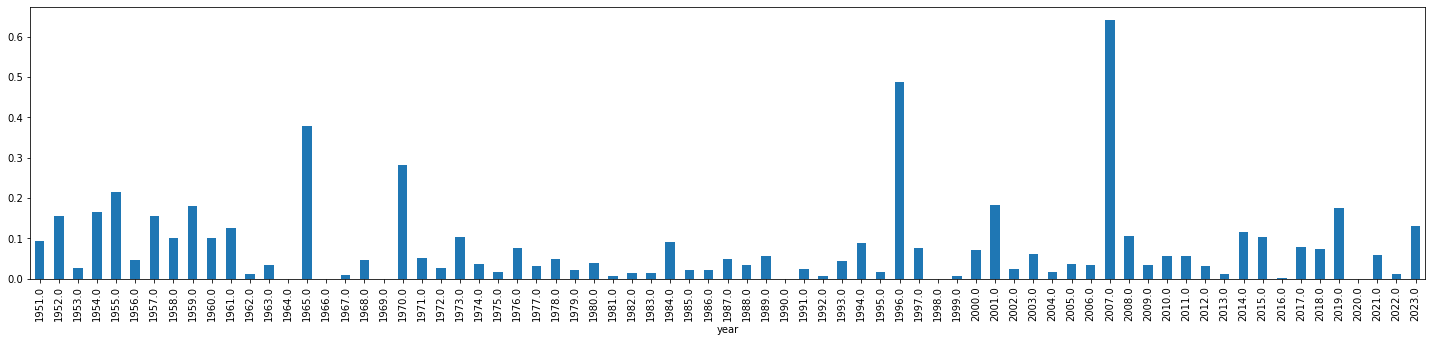

In [376]:
rookies[rookies['year'] > 1950].groupby('year')['ratio'].max().plot.bar(figsize=(25,5))

In [377]:
rank23(rookies[rookies['year'] > 1950].groupby('year')['ratio'].max())

'11 seasons larger than 2023, 61 seasons smaller than 2023, 0 seasons equal to 2023'

In [378]:
rookies.sort_values(by='ratio',ascending=False).head(30)

,year,name,possiblePoints,pointsWon,ratio
89,2007.0,Lewis Hamilton,170,109.0,0.641176
299,1950.0,Nino Farina,56,30.0,0.535714
292,1950.0,Luigi Fagioli,56,28.0,0.500000
822,1996.0,Jacques Villeneuve,160,78.0,0.487500
287,1950.0,Juan Fangio,56,27.0,0.482143
211,1965.0,Jackie Stewart,90,34.0,0.377778
439,1970.0,Clay Regazzoni,117,33.0,0.282051
291,1950.0,Louis Rosier,56,13.0,0.232143
113,1955.0,Eugenio Castellotti,56,12.0,0.214286
242,1950.0,Alberto Ascari,56,11.0,0.196429


In [379]:
rookies[rookies['year'] > 1950][['year','name','ratio']].sort_values(by='ratio',ascending=False).head(50).reset_index()

,index,year,name,ratio
0,89,2007.0,Lewis Hamilton,0.641176
1,822,1996.0,Jacques Villeneuve,0.487500
2,211,1965.0,Jackie Stewart,0.377778
3,439,1970.0,Clay Regazzoni,0.282051
4,113,1955.0,Eugenio Castellotti,0.214286
5,454,2001.0,Juan Pablo Montoya,0.182353
6,162,1959.0,Dan Gurney,0.180556
7,87,2007.0,Heikki Kovalainen,0.176471
8,457,2019.0,Alexander Albon,0.175238
9,673,1954.0,Karl Kling,0.166667


## Point differences

In [380]:
pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()

year
1950.0     30.00
1951.0     37.00
1952.0     53.50
1953.0     46.50
1954.0     57.14
           ...  
2019.0    413.00
2020.0    347.00
2021.0    388.50
2022.0    433.00
2023.0    479.00
Name: points, Length: 74, dtype: float64

In [381]:
pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[2])

year
1950.0     27.00
1951.0     27.00
1952.0     22.00
1953.0     29.50
1954.0     24.64
           ...  
2019.0    278.00
2020.0    214.00
2021.0    219.00
2022.0    291.00
2023.0    209.00
Name: points, Length: 74, dtype: float64

<Axes: xlabel='year'>

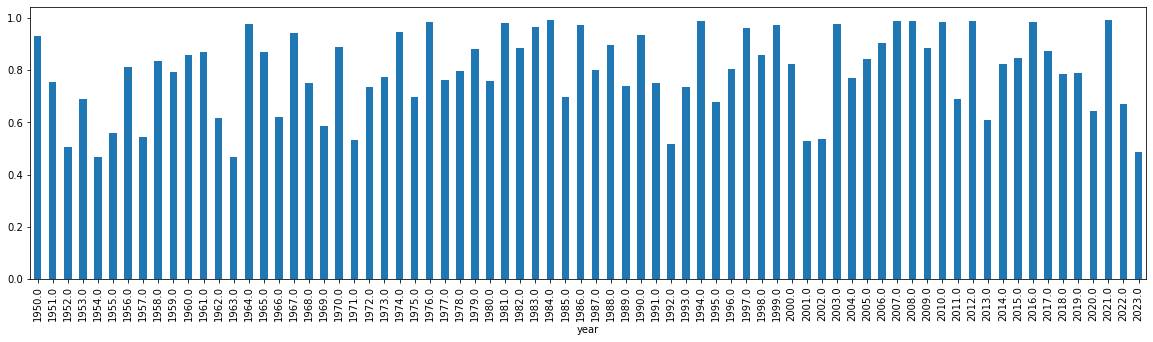

In [382]:
(pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).plot.bar(figsize=(20,5))

In [424]:
(pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).nsmallest()

year
1963.0    0.465753
1954.0    0.466223
2023.0    0.486430
1952.0    0.504673
1992.0    0.518519
Name: points, dtype: float64

In [383]:
rank23((pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()))

'71 seasons larger than 2023, 2 seasons smaller than 2023, 0 seasons equal to 2023'

<Axes: xlabel='year'>

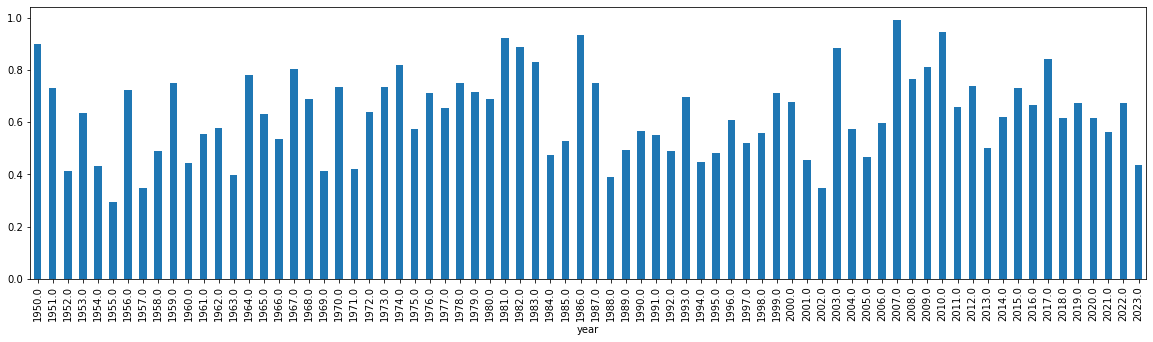

In [384]:
(pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[2]) / pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).plot.bar(figsize=(20,5))

In [423]:
rank23((pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[2]) / pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()))

'64 seasons larger than 2023, 9 seasons smaller than 2023, 0 seasons equal to 2023'

In [426]:
(pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[2]) / pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).nlargest()

year
2007.0    0.990909
2010.0    0.945312
1986.0    0.932432
1981.0    0.920000
1950.0    0.900000
Name: points, dtype: float64

<Axes: xlabel='year'>

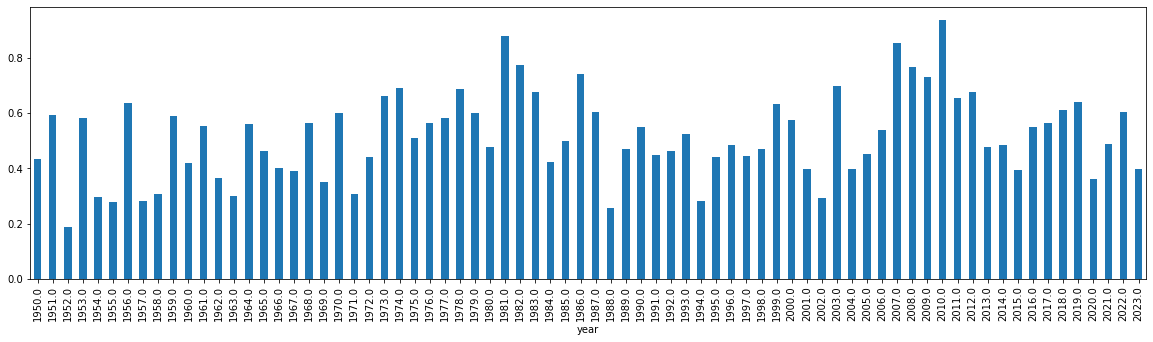

In [385]:
(pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest().iloc[3]) / pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).plot.bar(figsize=(20,5))

<Axes: xlabel='year'>

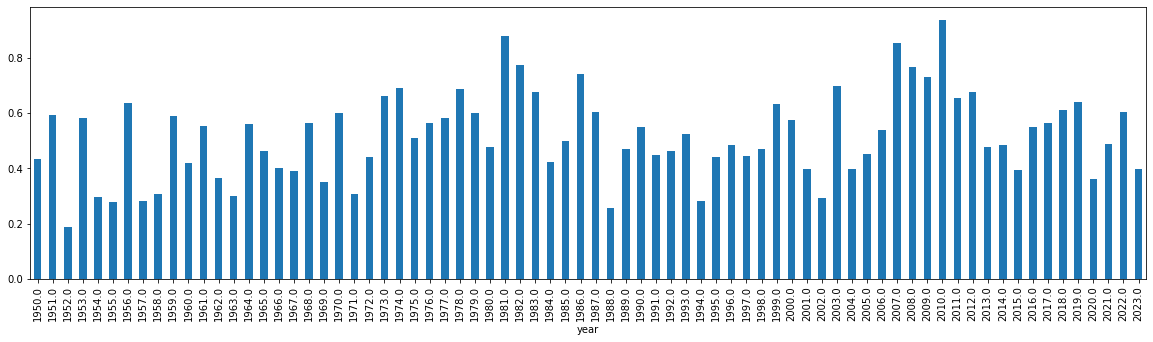

In [386]:
(pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest().iloc[3]) / pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).plot.bar(figsize=(20,5))

In [387]:
pd.DataFrame((pd.DataFrame(results.groupby(['year','constructor','name'])['points'].sum())).sort_values(by=['year','points'], ascending=[True, False]).groupby(['year','constructor'])['points'].max()).sort_values(by=['year','points'], ascending=[True,False]).tail(20)

points
year   constructor           
2022.0 Red Bull         433.0
       Ferrari          291.0
       Mercedes         262.0
       McLaren          116.0
       Alpine F1 Team    89.0
       Alfa Romeo        47.0
       Aston Martin      37.0
       AlphaTauri        23.0
       Haas F1 Team      21.0
       Williams           4.0
2023.0 Red Bull         479.0
       Mercedes         209.0
       Aston Martin     190.0
       McLaren          174.0
       Ferrari          170.0
       Alpine F1 Team    54.0
       Williams          25.0
       Alfa Romeo        10.0
       AlphaTauri        10.0
       Haas F1 Team       6.0

In [388]:
constructorChamps = pd.DataFrame((pd.DataFrame(results.groupby(['year','constructor','name'])['points'].sum())).sort_values(by=['year','points'], ascending=[True, False]).groupby(['year','constructor'])['points'].max()).reset_index()

In [389]:
constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])

year
1950.0     30.00
1951.0     37.00
1952.0     53.50
1953.0     46.50
1954.0     40.14
           ...  
2019.0    413.00
2020.0    347.00
2021.0    388.50
2022.0    433.00
2023.0    479.00
Name: points, Length: 74, dtype: float64

In [390]:
constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1])

year
1950.0     13.00
1951.0     28.00
1952.0     10.00
1953.0     29.50
1954.0     26.64
           ...  
2019.0    278.00
2020.0    214.00
2021.0    385.50
2022.0    291.00
2023.0    209.00
Name: points, Length: 74, dtype: float64

<Axes: xlabel='year'>

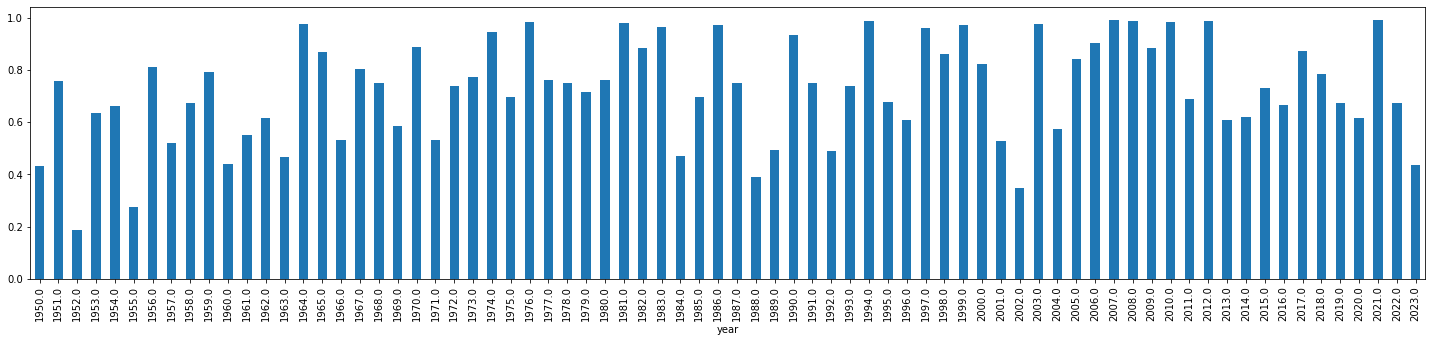

In [391]:
(constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])).plot.bar(figsize=(25,5))

In [392]:
newey = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2010, 2011, 2012, 2013, 2021, 2022, 2023]

In [393]:
constructorChamps2 = constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])

In [394]:
constructorChamps2[constructorChamps2.index.isin(newey)].mean()

0.778087689157481

In [395]:
(constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])).mean()

0.7255771931253822

In [396]:
(constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])).nsmallest(20)

year
1952.0    0.186916
1955.0    0.276341
2002.0    0.347222
1988.0    0.390476
1950.0    0.433333
2023.0    0.436326
1960.0    0.441860
1963.0    0.465753
1984.0    0.472222
1992.0    0.490741
1989.0    0.493827
1957.0    0.521739
2001.0    0.528455
1971.0    0.532258
1966.0    0.533333
1961.0    0.552632
2004.0    0.574324
1969.0    0.587302
1996.0    0.608247
2013.0    0.609572
Name: points, dtype: float64

In [397]:
(constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])).nlargest(10)

year
2021.0    0.992278
2007.0    0.990909
2008.0    0.989796
2012.0    0.989324
1994.0    0.989130
1976.0    0.985507
2010.0    0.984375
1981.0    0.980000
2003.0    0.978495
1964.0    0.975610
Name: points, dtype: float64

## Teams on podiums

<Axes: xlabel='year'>

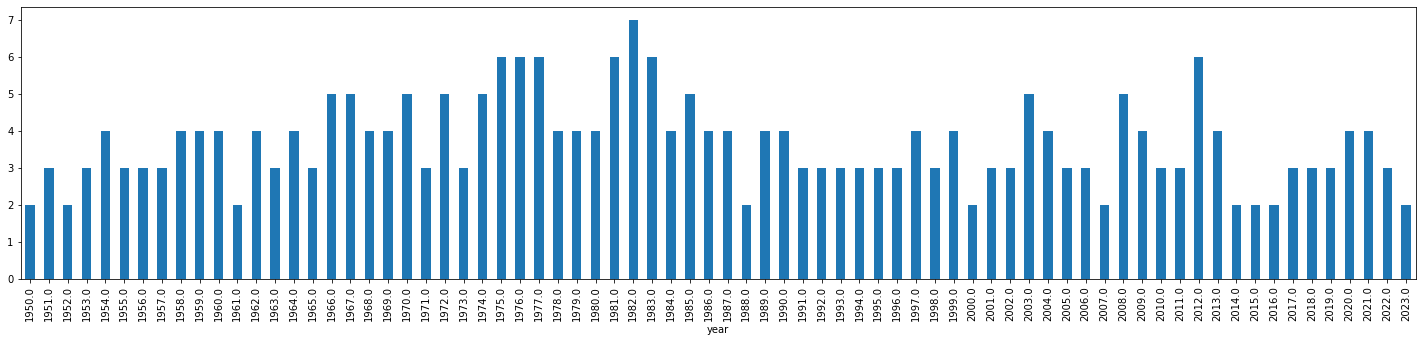

In [398]:
results[results['position'] == 1].groupby('year')['constructor'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

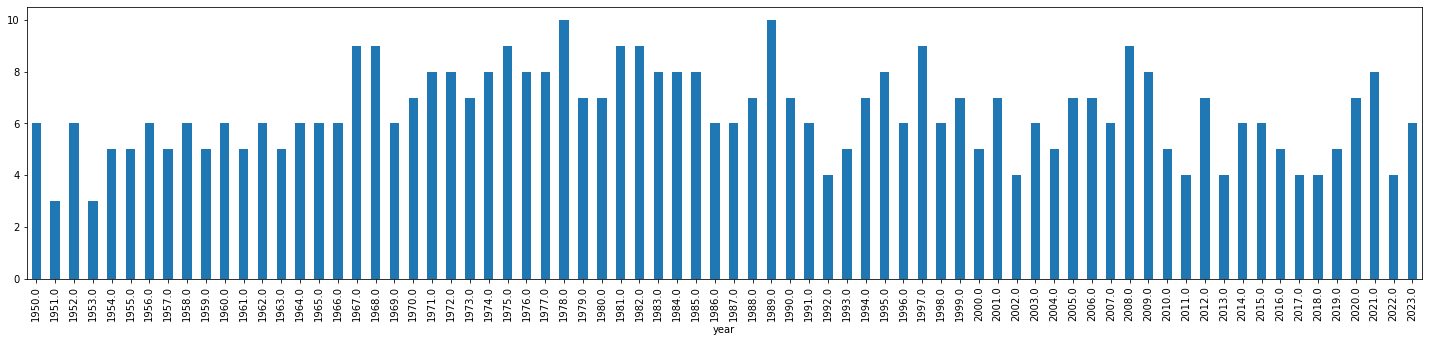

In [399]:
results[results['position'] <= 3].groupby('year')['constructor'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

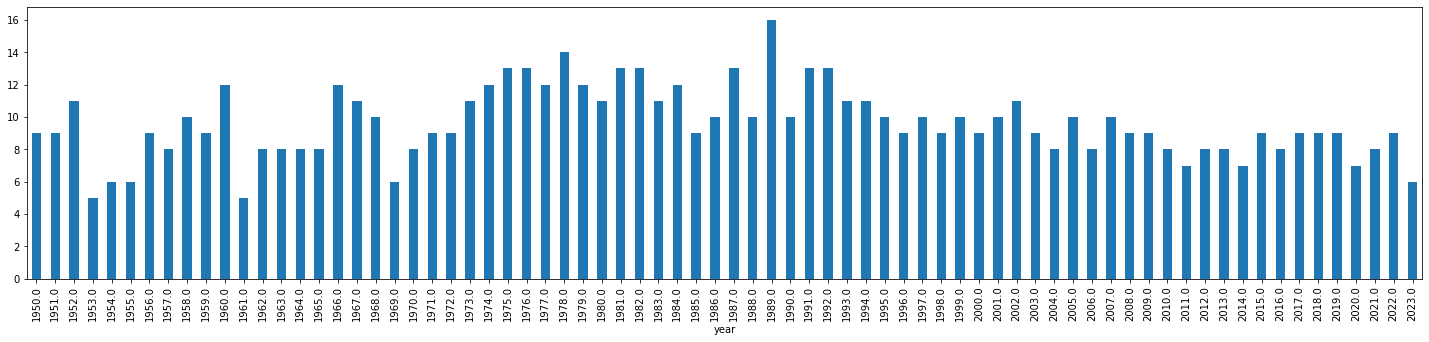

In [400]:
results[results['position'] <= 6].groupby('year')['constructor'].nunique().plot.bar(figsize=(25,5))

In [401]:
rank23(results[results['position'] <= 6].groupby('year')['constructor'].nunique())

'68 seasons larger than 2023, 2 seasons smaller than 2023, 3 seasons equal to 2023'

In [402]:
results[results['position'] <= 6].groupby('year')['constructor'].nunique().nsmallest(10)

year
1953.0    5
1961.0    5
1954.0    6
1955.0    6
1969.0    6
2023.0    6
2011.0    7
2014.0    7
2020.0    7
1957.0    8
Name: constructor, dtype: int64

<Axes: xlabel='year'>

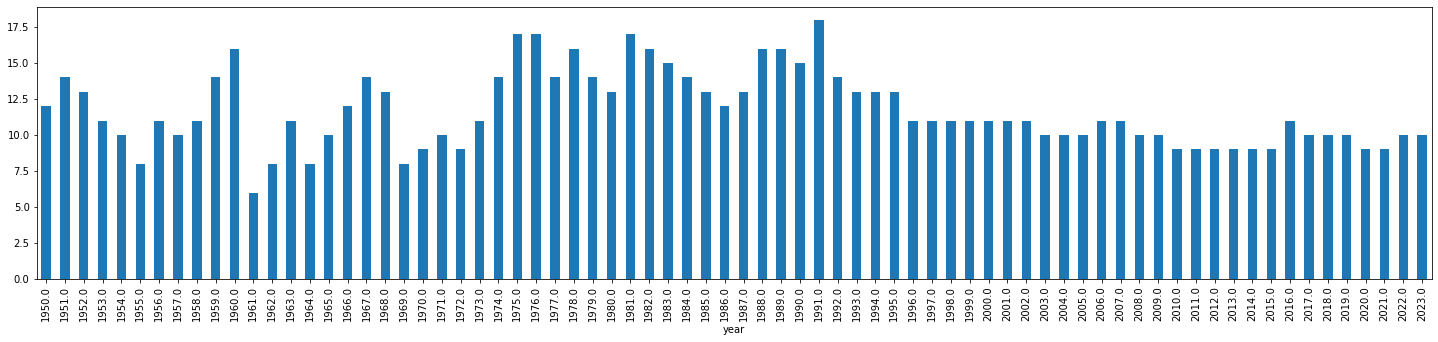

In [475]:
results[results['position'] <= 10].groupby('year')['constructor'].nunique().plot.bar(figsize=(25,5))